In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [3]:
x = np.diag([i for i in range(50)])
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  2, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ..., 47,  0,  0],
       [ 0,  0,  0, ...,  0, 48,  0],
       [ 0,  0,  0, ...,  0,  0, 49]])

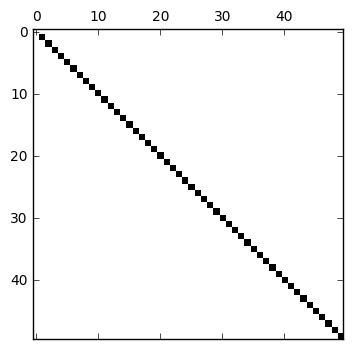

In [6]:
plt.spy(x)

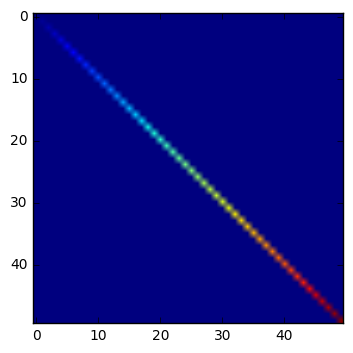

In [7]:
plt.imshow(x)

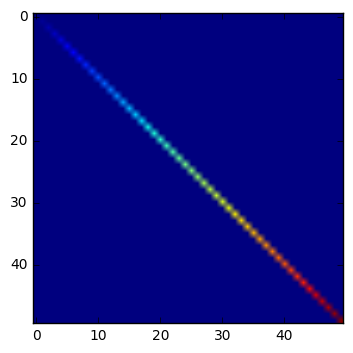

In [99]:
cm = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#000000', '#FF0000'])
plt.imshow(x, cmap = "jet")

In [135]:
plt.imsave('grad_diag.png', x, cmap = "jet")

In [136]:
y = plt.imread('grad_diag.png')
y.shape
y[:, :, 3] = np.diag([1] * 50)

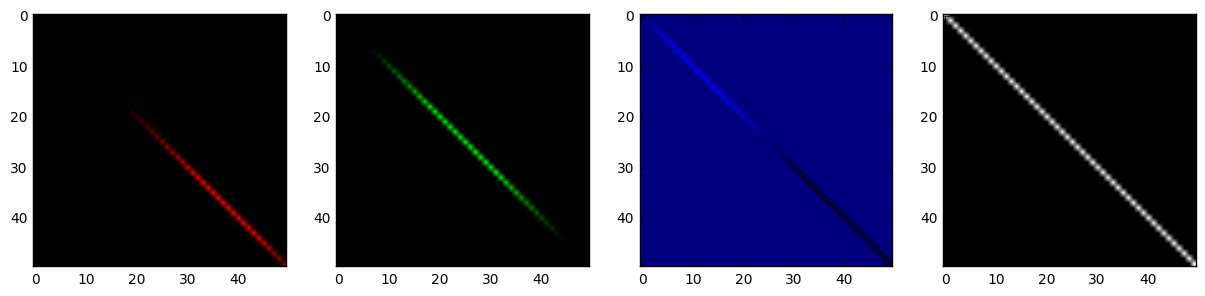

In [137]:
fig, ax = plt.subplots(1, 4, figsize = (15, 15))
cm1 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#000000', '#FF0000'])
ax[0].imshow(y[:, :, 0], cmap = cm1)
cm2 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#000000', '#00FF00'])
ax[1].imshow(y[:, :, 1], cmap = cm2)
cm3 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#000000', '#0000FF'])
ax[2].imshow(y[:, :, 2], cmap = cm3)
cm4 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#000000', '#FFFFFF'])
ax[3].imshow(y[:, :, 3], cmap = cm4)

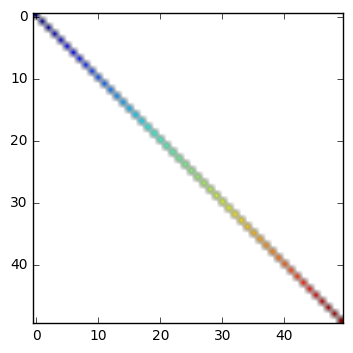

In [138]:
plt.imshow(y)

In [139]:
from scipy.interpolate import interp1d
from scipy.integrate import quad

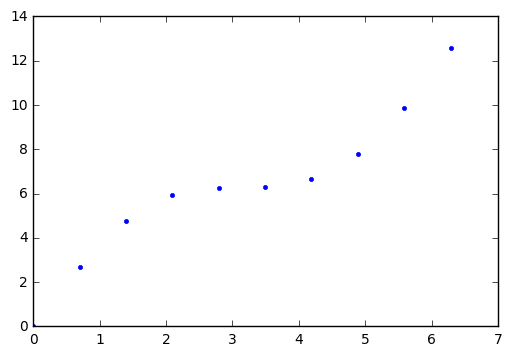

In [142]:
x = np.linspace(0, 2 * np.pi, 10)
y = 2 * x + 2 * np.sin(x)
plt.plot(x, y, '.')

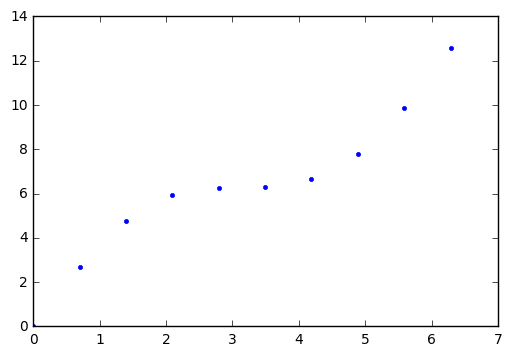

In [145]:
f = interp1d(x, y)
plt.plot(x, f(x), '.')

In [147]:
(y - f(x)).any()

False

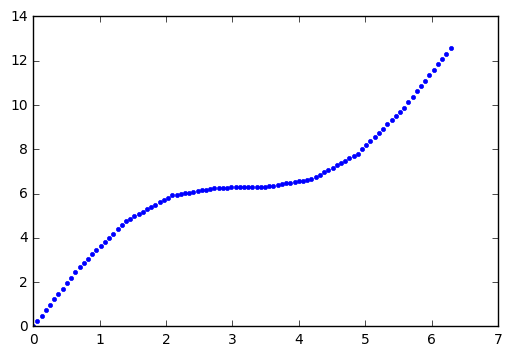

In [149]:
x1 = np.linspace(0, 2 * np.pi, 100)
plt.plot(x1, f(x1), '.')

In [159]:
int1, _ = quad(f, 0, 2 * np.pi)
int1

39.47841760435743

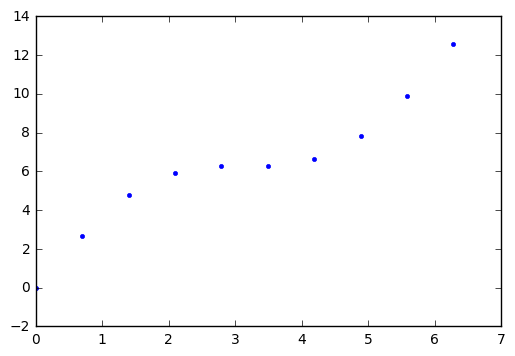

In [152]:
f2 = interp1d(x, y, kind = 'cubic')
plt.plot(x, f2(x), '.')

In [154]:
(y - f2(x)).any()

True

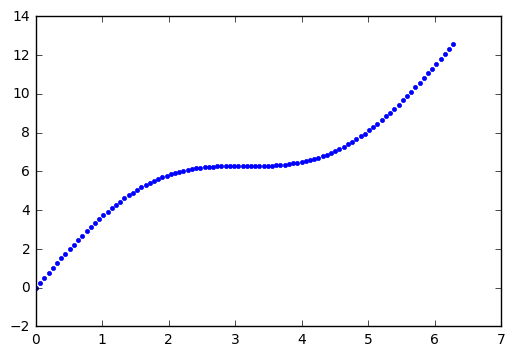

In [155]:
plt.plot(x1, f2(x1), '.')

In [162]:
int2, _ = quad(f2, 0, 2 * np.pi)
int2

39.47841760435741

In [166]:
print(np.abs(int1 - int2))

2.13162820728e-14


In [170]:
from scipy.interpolate import interp2d, RectBivariateSpline
from scipy.integrate import dblquad

In [188]:
x = np.linspace(0, 2 * np.pi, 10)
y = np.linspace(0, 2 * np.pi, 10)
X, Y = np.meshgrid(x, y)

In [189]:
Z = np.abs(X - np.pi) + np.abs(Y - np.pi) + np.sin(X + Y - 2 * np.pi)

In [179]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

(0, 10)

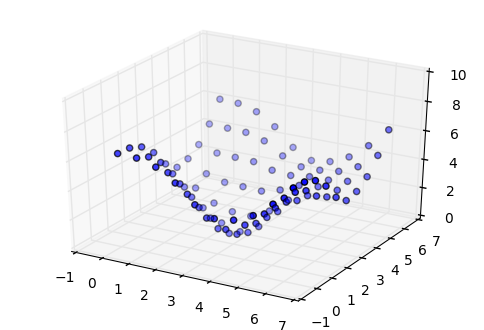

In [190]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
#ax.plot_surface(X, Y, Z)
ax.scatter3D(X, Y, Z)
ax.set_zlim([0, 10])

In [191]:
f3 = interp2d(X, Y, Z, kind='cubic')

(0, 10)

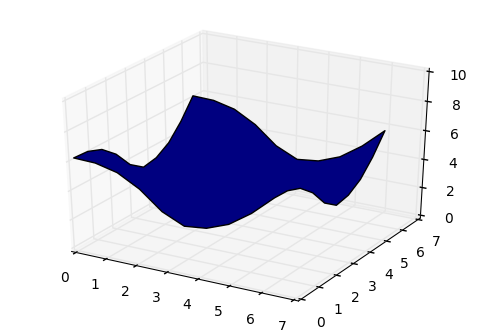

In [199]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(X, Y, f3(x, y))
ax.set_zlim([0, 10])

In [216]:
%%timeit
dblquad(f3, 0, 2 * np.pi, lambda x : 0, lambda x : 2 * np.pi)

1 loop, best of 3: 6.83 s per loop


In [202]:
f4 = RectBivariateSpline(x, y, Z)

In [218]:
%%timeit
dblquad(f4, 0, 2 * np.pi, lambda x : 0, lambda x : 2 * np.pi)

1 loop, best of 3: 1.83 s per loop


(0, 10)

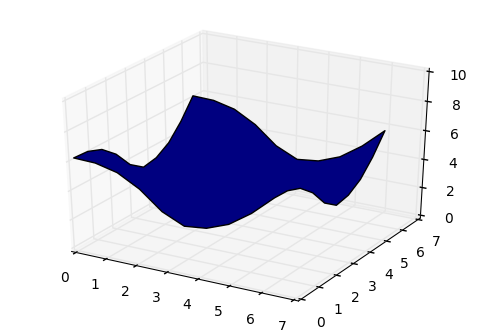

In [212]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(X, Y, f4(x, y))
ax.set_zlim([0, 10])

In [217]:
%%timeit
f4.integral(0, 2 * np.pi, 0, 2 * np.pi)

The slowest run took 18.95 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 2 µs per loop
